# 선형 회귀 (Linear Regression)
>**목차**
1. 개념정리
2. 손실함수: 평균제곱오차 (Mean Squared Error)
3. 최적화: 경사하강법 (Gradient Descent) 
4. 실습1: 단순선형회귀분석(Simple Linear Regression Analysis)
5. 실습2: 다중선형회귀분석(Multiple Linear Regression Analysis)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

## 1. 개념정리
---

</br>

###<center> < 가설 > </center>
###  <center>$f(x_i)=wx_i+b$</center>

</br>

### <center> < 목적 > </center>
### <center>$(w^{*}, b^{*})=arg \; min \sum_{i=1}^m(y_i-\hat{y}_i)^2$</center>
### <center>$=arg \; min \sum_{i=1}^m(y_i-f(x_i) )^2$</center>
### <center>$=arg \; min \sum_{i=1}^m(y_i-wx_i-b)^2$</center>

### **구현**


In [68]:
def hypothesis(x, w=1, b=0):
  return w*x+b

### **예제**

|공부시간|종합점수|
|------|---|
|1|1.1|
|2|1.2|
|3|2.2|
|4|3.1|
|5|3.7|

* 데이터 정의

In [69]:
x = np.array([[1],
             [2],
             [3],
             [4],
             [5]])

y = np.array([[1.1],
             [1.2],
             [2.3],
             [3.1],
             [3.7]])

x.shape, y.shape

((5, 1), (5, 1))

* 예측

In [70]:
w = np.array([[1]])
print(w.shape)

y_pred = hypothesis(x, w=w)
print(y.shape)

(1, 1)
(5, 1)


* 시각화

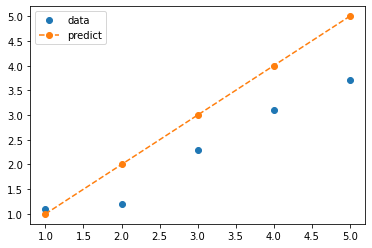

In [71]:
plt.plot(x, y , marker='o', linestyle='')
plt.plot(x, y_pred, marker='o', linestyle='--')
plt.legend(["data", "predict"])
plt.show()

## 2. 손실함수: 평균제곱오차 (Mean Squred Error)
---

</br>

### <center>$ MSE = \sum_{i=1}^m(y_i-\hat{y}_i)^2$</center>

### <center>$=\sum_{i=1}^m(y_i-wx_i-b)^2$

### **구현**

In [73]:
def mse(y, y_pred):
  error=0
  for i in range(len(y)):
    error += (y[i]-y_pred[i])**2
  return error

def mse(y, y_pred):
  return np.sum([(yi-yi_pred)**2 for yi, yi_pred in zip(y, y_pred)])

* 계산

In [74]:
error = mse(y, y_pred)
print(error)

3.6399999999999997


### **Error 시각화**

*  W 값에 따른 Error 값 변화

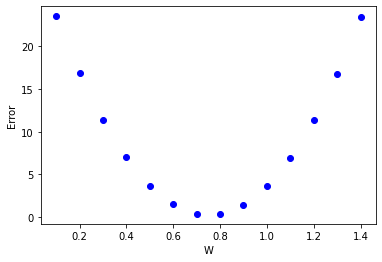

In [75]:
W = np.arange(0.1, 1.5, 0.1)

for w in W:
  y_pred = hypothesis(x, w)
  error = mse(y, y_pred)
  plt.plot(w, error, marker='o', color='b')

plt.xlabel("W")
plt.ylabel("Error")
plt.show()

## 3. 최적화: 경사하강법 ( Gradient Desent )
---
</br>

## <center>$w^* =  w-\alpha\frac{\theta }{\theta w}Cost(w) $</center>


<center> 기울기가 음수일 때: $\frac{\theta }{\theta w}Cost(w) < 0 \rightarrow w* = w+\alpha*(기울기)$</center>
<center>기울기가 음수이면 $w$는 지금보다 큰 값으로 업데이트</center>

</br>

<center> 기울기가 양수일 때: $\frac{\theta }{\theta w}Cost(w) > 0 \rightarrow w* = w-\alpha*(기울기)$</center>
<center>기울기가 양수이면 $w$는 지금보다 작은 값으로 업데이트</center>


### **구현**

In [76]:
def gradient(xi, yi, w):
  return 2*xi**2*w-2*xi*yi  

def gradient_desent(xi, yi, w, alpha=0.01):
  return w-(alpha*gradient(xi, yi, w))

### **학습**

In [77]:
w=1
for xi, yi in zip(x, y):
  w = gradient_desent(xi, yi, w)
  print(w)

[1.002]
[0.96984]
[0.9332688]
[0.88262278]
[0.81131139]


### **파라미터**: $\alpha$ 값에 따른 W 변화

In [36]:
w=1
for xi, yi in zip(x, y):
  w = gradient_desent(xi, yi, w, alpha=0.02)
  print(w)

[1.004]
[0.93936]
[0.8771904]
[0.81178854]
[0.74]


## 4. 실습1: 단순 선형 회귀 분석(Simple Linear Regression Analysis)
---

<br>

###  <center>$f(x_i)=wx_i+b$</center>



### **데이터**

|공부시간|종합점수|
|------|---|
|0|0|
|1|11|
|2|23|
|3|30|
|4|44|
|5|55|
|6|61|
|7|73|
|8|84|
|9|98|



* 데이터 정의

In [37]:
x = [0,1,2,3,4,5,6,7,8,9]
y = [0,11,23,30,44,55,61,73,84,98]

* 시각화

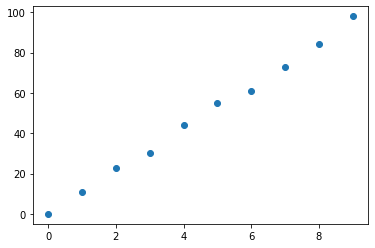

In [38]:
plt.plot(x,y, linestyle='', marker='o')
plt.show()

### **모델 생성**

* 케라스를 이용한 모델 구현

In [39]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* 학습파라미터 확인

In [40]:
print(model.get_weights())
W = model.get_weights()[0]
b = model.get_weights()[1]
print("W:",W, "b:", b)

[array([[0.36663306]], dtype=float32), array([0.], dtype=float32)]
W: [[0.36663306]] b: [0.]


* 학습파라미터 시각화

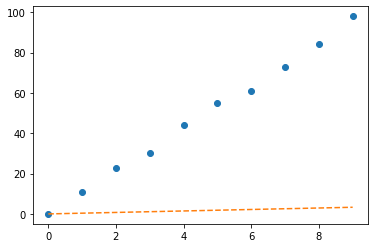

In [41]:
plt.plot(x,y, linestyle='', marker='o')
plt.plot(x, model.predict(x), linestyle='--')
plt.show()

### **학습**

* 모델 컴파일

In [42]:
model.compile(optimizer = optimizers.SGD(learning_rate=0.01),
              loss = 'mse',
              metrics=['mse']
              )

* 학습 진행

In [43]:
model.fit(x, y, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 556ms/step - loss: 3003.8247 - mse: 3003.8247
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 521.7222 - mse: 521.7222
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 92.9028 - mse: 92.9028
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 18.8141 - mse: 18.8141
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 6.0096 - mse: 6.0096
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 3.7929 - mse: 3.7929
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 3.4053 - mse: 3.4053
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 3.3338 - mse: 3.3338
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 3.3170 - mse: 3.3170
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 3.3097 - mse: 3.3097


### **결과**

* 학습 파라미터 확인

In [44]:
print(model.get_weights())
W = model.get_weights()[0]
b = model.get_weights()[1]
print("W:",W, "b:", b)

[array([[10.384202]], dtype=float32), array([1.521816], dtype=float32)]
W: [[10.384202]] b: [1.521816]


* 시각화

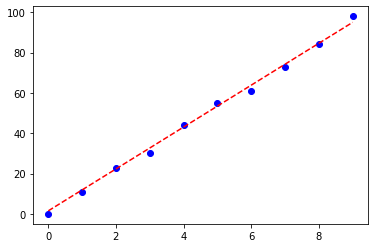

In [45]:
plt.plot(x, y, 'b', linestyle='', marker='o')
plt.plot(x, model.predict(x), 'r', linestyle='--', marker='')
plt.show()

* 결과예측

In [46]:
print(model.predict([11]))

[[115.74803]]


## 5. 실습2: 다중선형회귀 (Multiple Linear Regression Analysis)
---
<br>

###  <center>$f(\vec{x_i})=\vec{w}\vec{x}_i+b$</center>

### **데이터**
|공부시간|집중도|수면시간|종합성적|
|------|---|---|---|
|0|1|9|0|
|1|1|8.5|11|
|2|2|8|23|
|3|4|8|30|
|4|3|7|44|
|5|5|7.5|55|
|6|6|7|61|
|7|6|6|73|
|8|7|7|84|
|9|6|6.5|98|



* 데이터 정의

In [47]:
x = [[0,1,9],
      [1,1,8.5],
      [2,2,8],
      [3,4,8],
      [4,3,7],
      [5,5,7.5],
      [6,6,7],
      [7,6,6],
      [8,7,7],
      [9,6,6.5 ]
     ]
y = [0,11,23,30,44,55,61,73,84,98]

### **모델 생성**

* 케라스를 이용한 모델 생성

In [48]:
model = Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


* 학습 파라미터 확인

In [50]:
print(model.get_weights())
W = model.get_weights()[0]
b = model.get_weights()[1]
print("W:",W, "b:", b)

[array([[-0.6100277 ],
       [ 0.45049822],
       [ 0.8305212 ]], dtype=float32), array([0.], dtype=float32)]
W: [[-0.6100277 ]
 [ 0.45049822]
 [ 0.8305212 ]] b: [0.]


### **학습**

* 모델 컴파일

In [53]:
model.compile(optimizer = optimizers.SGD(learning_rate=0.01),
              loss = 'mse',
              metrics=['mse']
              )

* 학습 진행

In [54]:
model.fit(x, y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 240ms/step - loss: 2838.3240 - mse: 2838.3240
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 2334.1804 - mse: 2334.1804
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 1944.5195 - mse: 1944.5195
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 1636.7217 - mse: 1636.7217
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 1388.8860 - mse: 1388.8860
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 1186.0642 - mse: 1186.0642
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 1017.8533 - mse: 1017.8533
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 876.8522 - mse: 876.8522
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 757.6689 - mse: 757.6689
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 656.2782 - mse: 656.2782


### **결과**

* 학습 파라미터 확인

In [55]:
print(model.get_weights())
W = model.get_weights()[0]
b = model.get_weights()[1]
print("W:",W, "b:", b)

[array([[ 5.0927286],
       [ 3.7518065],
       [-1.7156858]], dtype=float32), array([-0.10384521], dtype=float32)]
W: [[ 5.0927286]
 [ 3.7518065]
 [-1.7156858]] b: [-0.10384521]


* 결과 예측

In [56]:
sample = [[11,4,6]]
print(model.predict(sample))

[[60.629288]]
